# Digital Image Steganography using LSB Method

A simple python-based program implementing the Digital Image Steganography using LSB Method. Image Steganography is the technique of hiding text data in a digital image in such a way such that from bare eyes it is not possible to tell whether the image contains some secret text hidden in it. Out of the many techniques, one of the most basic and simple technique is the LSB (Least Significant Bit) Method.

In this notebook, the LSB Method has been implemented for hiding a text data in an image, and, given such an image, how the hidden data can be retrieved.

In [1]:
# Necessary Package Imports: PIL, numpy, pyplot
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def image_to_mat(filename):
    """
    A Helper function that takes an image filename, parses the image, and converts it to an array
    """
    img = Image.open(filename)
    return np.asarray(img)


In [3]:
def binarize(text: str):
    """
    Takes an ascii string, and converts each character to the 8-bit binary of its corresponding ascii value

    This is a Helper Function used in the function hide()
    """
    binary_str = ""
    for letter in text:
        binary = bin(ord(letter))[2:].zfill(8)
        binary_str += binary

    return binary_str

In [4]:
def mat_to_image(mat, filename):
    """Helper Function: Given a matrix, it converts it to the corresponding image, and saves it"""
    img = Image.fromarray(mat)
    img.save(f"output_{filename}")


In [5]:
def hide(img_arr, text_to_hide: str = ""):
    """
    The Text Hiding Function
    Takes an image matrix, and the text to hide
    Hides the text in the image
    Returns the new image matrix
    """
    binary_text = binarize(text_to_hide)

    n_rows, n_cols, n_channels = img_arr.shape

    new_img_arr = np.copy(img_arr)

    index = 0

    for row in range(n_rows):
        for col in range(n_cols):
            for channel in range(n_channels):
                ip_pixel = img_arr[row, col, channel]
                ip_pixel_bin = bin(ip_pixel)
                op_lsb = binary_text[index]
                op_pixel_bin = ip_pixel_bin[:-1] + op_lsb
                op_pixel = int(op_pixel_bin, 2)
                new_img_arr[row, col, channel] = op_pixel
                index += 1
                if index == len(binary_text):
                    return new_img_arr

    return None


In [6]:
# Take user input the "Text to hide"
ip_text = input("Text to hide: ")
ip_text += '\0' # Appending a terminating null character

Text to hide: Attack is planned on Dec 12, 2022 at 8:00 pm


In [7]:
# Take user input the image filename
image_filename = input("Cover Image Filename: ")

Cover Image Filename: souradip.png


In [8]:
# Convert the image to the matrix form
img_arr = image_to_mat(filename=image_filename)
print(img_arr)

[[[246 214  43]
  [248 216  45]
  [249 218  42]
  ...
  [163 156 140]
  [162 156 142]
  [165 159 145]]

 [[247 215  44]
  [248 216  45]
  [249 218  42]
  ...
  [161 154 138]
  [161 155 141]
  [163 157 143]]

 [[248 217  39]
  [247 216  38]
  [249 217  46]
  ...
  [161 154 138]
  [161 155 141]
  [161 155 141]]

 ...

 [[203 195 174]
  [202 194 173]
  [201 193 172]
  ...
  [229 218 200]
  [228 219 202]
  [228 219 202]]

 [[203 196 177]
  [201 194 175]
  [199 192 173]
  ...
  [228 219 202]
  [228 221 205]
  [228 221 205]]

 [[204 197 178]
  [201 194 175]
  [198 191 172]
  ...
  [228 219 202]
  [228 221 205]
  [228 221 205]]]


In [9]:
# Hide the text in the image
op_img_arr = hide(img_arr=img_arr, text_to_hide=ip_text)
print(op_img_arr)

[[[246 215  42]
  [248 216  44]
  [248 219  42]
  ...
  [163 156 140]
  [162 156 142]
  [165 159 145]]

 [[247 215  44]
  [248 216  45]
  [249 218  42]
  ...
  [161 154 138]
  [161 155 141]
  [163 157 143]]

 [[248 217  39]
  [247 216  38]
  [249 217  46]
  ...
  [161 154 138]
  [161 155 141]
  [161 155 141]]

 ...

 [[203 195 174]
  [202 194 173]
  [201 193 172]
  ...
  [229 218 200]
  [228 219 202]
  [228 219 202]]

 [[203 196 177]
  [201 194 175]
  [199 192 173]
  ...
  [228 219 202]
  [228 221 205]
  [228 221 205]]

 [[204 197 178]
  [201 194 175]
  [198 191 172]
  ...
  [228 219 202]
  [228 221 205]
  [228 221 205]]]


In [10]:
# Convert the text-hidden matrix to image and save
mat_to_image(op_img_arr, image_filename)

(-0.5, 3023.5, 4031.5, -0.5)

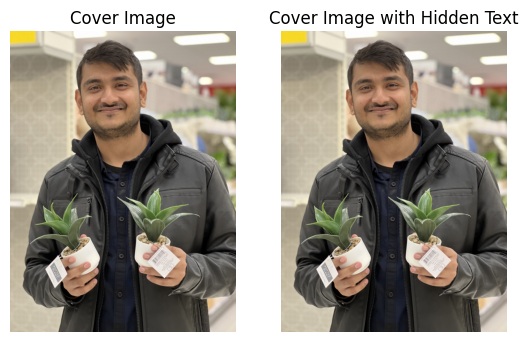

In [11]:
# Display the Original Cover Image, and the Produced Image with Hidden Text

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Cover Image")
ax1.imshow(img_arr)
plt.axis('off')

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Cover Image with Hidden Text")
ax2.imshow(op_img_arr)

plt.axis('off') 

Hence, it is almost impossible to tell in bare eyes whether any secret text is hidden in this image or not

In [12]:
def stringify(bin_text: str):
    """
    Takes binary stream of data, where each byte represents a character in the ASCII representation,
    and converts it to the corresponding ascii string

    This is a Helper Function used in the function unhide()
    """
    text = ""
    i = 0

    while i < len(bin_text):
        bin_word = bin_text[i:i + 8]
        word = chr(int(bin_word, 2))
        text += word
        i += 8
    
    return text


In [13]:
def unhide(img_arr):
    """
    Takes the image array, and tries to retrieve the hidden text
    """
    n_rows, n_cols, n_channels = img_arr.shape

    binary_text = ""
    binary_word = ""
    
    curr_length = 0

    for row in range(n_rows):
        for col in range(n_cols):
            for channel in range(n_channels):
                ip_pixel = img_arr[row, col, channel]
                ip_pixel_bin = bin(ip_pixel)
                ip_lsb = ip_pixel_bin[-1]
                binary_word += ip_lsb
                curr_length += 1
                
                if curr_length == 8:
                    if stringify(binary_word) == '\x00':
                        return stringify(binary_text)
                    else:
                        binary_text += binary_word
                        binary_word = ""
                    curr_length = 0
    return ""


In [14]:
# Convert the output image to its matrix form
new_img_arr = image_to_mat(filename=f'output_{image_filename}')
print(new_img_arr)

[[[246 215  42]
  [248 216  44]
  [248 219  42]
  ...
  [163 156 140]
  [162 156 142]
  [165 159 145]]

 [[247 215  44]
  [248 216  45]
  [249 218  42]
  ...
  [161 154 138]
  [161 155 141]
  [163 157 143]]

 [[248 217  39]
  [247 216  38]
  [249 217  46]
  ...
  [161 154 138]
  [161 155 141]
  [161 155 141]]

 ...

 [[203 195 174]
  [202 194 173]
  [201 193 172]
  ...
  [229 218 200]
  [228 219 202]
  [228 219 202]]

 [[203 196 177]
  [201 194 175]
  [199 192 173]
  ...
  [228 219 202]
  [228 221 205]
  [228 221 205]]

 [[204 197 178]
  [201 194 175]
  [198 191 172]
  ...
  [228 219 202]
  [228 221 205]
  [228 221 205]]]


In [15]:
# Retrieve the Hidden text from the image
op_text = unhide(new_img_arr)
print(f"The Hidden Text is: {op_text}")

The Hidden Text is: Attack is planned on Dec 12, 2022 at 8:00 pm


Awesome, so we have retrieved the hidden text in that image!